# 15.5: Romberg Integration

Recall the Composite Trapezoidal Rule:

$$
I_{trap} = \frac{h}{2} [f(a) + 2\sum_{k=1}^{r-1}f(a+kh)+f(b)]
$$

this is $\mathcal{O}(h^2)$ which means this is the worst error.

However, suppose we set $h_1 = b-a$ and $h_2 = \frac{h_1}{2} = \frac{b-a}{2}$. This yields 2 approximations:

$$
\begin{aligned}
    R_{1,1} &= \frac{h_1}{2}(f(a)+f(b))\\
    R_{2,1} &= \frac{h_2}{2}(f(a)+2f(a+h_2)+f(b))
\end{aligned}
$$

The corresponding errors are as follows:

$$
\begin{aligned}
    E_{1,1} &= I_f -  R_{1,1} = K_1h_1^2 + H_2h_1^4 + K_3h_1^6 + \cdots\\
    E_{2,1} &= I_f - R_{1,1} = K_1(\frac{h_1}{2})^2 + K_2(\frac{h_1}{2})+K_3(\frac{h_1}{2})^6 + \cdots
\end{aligned}
$$

Where $I_f$ is the true value of the integral. However, we notice that:

$$
E_{1,1} - 4E_{2,1} = K_1(h_1^2 - 4\frac{h_1^2}{4}) + K_2(h_1^4 - 4\frac{h_1^4}{16}) + K_3(h_1^6 - 4\frac{h_1^6}{64}) + \cdots
$$

However, the first terms cancel, which means that the error is actually $\mathcal{O}(h^4)$. Also...

$$
E_{1,1} - 4E_{2,1} = (I_f - R_{1,1}) - 4(I_f - R_{2,1}) = (4R_{2,1} - R_{1,1}) - 3I_f
$$

If we solve for $I_f$, then we get that:

$$
I_f = \frac{4R_{2,1}-R_{1,1}}{3} - \frac{E_{1,1} - 4E_{2,1}}{3}
$$

This means that without doing any additional function evalutations, we can have a way to compute integrals that is more accurate. 

$$
R_{2,2} = \frac{4R_{2,1}-R_{1,1}}{3} = R_{2,1} + \frac{R_{2,1}-R_{1,1}}{3}
$$

## General Romberg Algorithm

Given $I_f = \int_a^b f(x)\:dx$

0. Choose an initial $r$ (# of subintervals) $\implies h = \frac{b-a}{r}$, and then choose an integer $s>0$ (how many steps of Romberg integration)
1. For $j=1$ to $s$:
    * $R_{j,1} = \frac{h}{2^{j-1}}[f(a) + 2 \sum_{k=1}^{r \cdot 2^{j-1}}f(a+kh) + f(b)]$
2. For $k=2$ to $s$:
    * For $j=k$ to $s$:
        * $R_{j,k} = R_{j, k-1} + R_{j, k-1} - \frac{R_{j-1, k-1}}{4^{k-1} - 1}$

> Step 2. has error $\mathcal{O}(h^{2s})$. This means that the bigger the value of $s$, the better the accuracy of the algorithm

## Code for the Romberg Integration

Check out this function below:

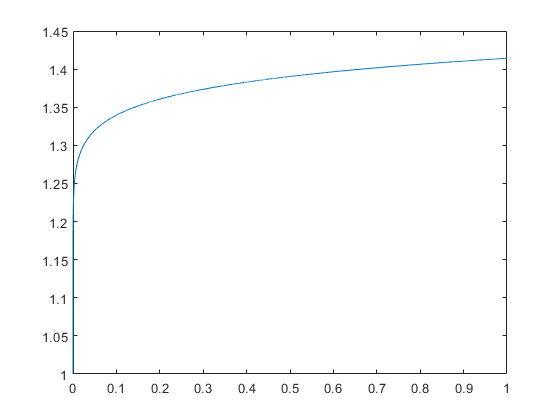

In [2]:
f = @(x) sqrt(x .^ 0.1 + 1);

a = 0;
b = 1;
x = linspace(a, b, 10000);

figure
plot(x, f(x))

This function is very hard to integrate, so we will use Romberg to integrate this function. Let's start by writing the code for the trapezoidal function:

In [3]:
%%file trapRule.m

function Itrap = trapRule(f, a, b, r)
    h = (b-a)/r;
    
    Itrap = f(a); % Initialize our sum
    
    for i=1:r-1
        Itrap = Itrap + 2*f(a+i*h); 
    end
    
    Itrap = Itrap + f(b); 
    Itrap = (h/2)*Itrap; 
end

Created file 'C:\Users\bushn\Home\Notes\STEM-Notes\MATH350 Numerical Methods\Chapter 15 - Numerical Integration\trapRule.m'.


Next we will write some code to get the initial values calling our Trapezoidal rule:

In [8]:
s = 4;
R = zeros(s);
r = 1;

for j = 1:s
    R(j,1) = trapRule(f, a, b, r*2^(j-1));
end

R


R =

    1.2071         0         0         0
    1.2987         0         0         0
    1.3423         0         0         0
    1.3630         0         0         0




Now we will finish our code by computing the rest of the Romberg terms in a double for-loop:

In [10]:
for k = 2:s
    for j = k:s
        R(j,k) = R(j, k-1) + (R(j, k-1) - R(j-1, k-1)) / (4^(k-1) - 1);
    end
end

R


R =

    1.2071         0         0         0
    1.2987    1.3293         0         0
    1.3423    1.3569    1.3587         0
    1.3630    1.3698    1.3707    1.3709




We can write code to check the true value and the errors with the following code:

In [11]:
Itrue = (8 * (32768 + 95259 * sqrt(2)))/969969
E = tril(abs(R-Itrue))


Itrue =

    1.3814


E =

    0.1743         0         0         0
    0.0826    0.0521         0         0
    0.0390    0.0245    0.0227         0
    0.0184    0.0115    0.0107    0.0105


